# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work
### (5 Marks)

*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Anthony | Kelly | Anthony Kelly, September 20 2024 | 3 | 25% |
| Member 2: | Max | Willms | Max Willms, September 24, 2024 | 3 | 25% |
| Member 3: | Pinyi | Lin | Pinyi Lin, September 25, 2024 | 3 | 25% |
| Member 4: | David | Amoah Vervoorn | David Amoah Vervoorn , September 23 2024 |  3| 25% |


## Part 1: Printing to the Console
### (6 Marks)

In [6]:
# In the space below, please print "Hello, World! Welcome to the Student Gradebook Management System."
# (1 mark)
# It introduces users to the "Student Gradebook Management System"
print("Hello, World! Welcome to the Student Gradebook Management System.")

Hello, World! Welcome to the Student Gradebook Management System.


In [7]:
# Fill in your information using the defined variables below:
# (1 mark)
# These lines define variables to store information about the lab group and academic details.
# lab_group_number stores the group number as a string
lab_group_number = "6"
# intake_year stores the year of intake as a string
intake_year = "2024"
# intake_semester stores the semester of intake as a string (Fall or Winter)
intake_semester = "Fall" #"Fall" or "Winter"

# Using f-strings and the variables above, print "This is implemented by Group <lab_group_number>, for ENGG680 <intake_semester> of <intake_year>"
# (2 marks)
# The line prints a message using an f-string to effectively insert the values defined by variables above.
print(f"This is implemented by Group {lab_group_number}, for ENGG680 {intake_semester} of {intake_year}")


This is implemented by Group 6, for ENGG680 Fall of 2024


In [8]:
# Use indexing to print "The subjects involved in this grading system is English and Math." using "subjects" below.
# (2 marks)
# The line defines a tuple named "subjects" containing the subjects involved in grading system(English and Math)
subjects = ("English", "Math")

# This line prints a message indicating the subjects in grading system.
# It uses indexing accessing individual elements within subjects tuple (sunjects[0] for English, subject[1] for Math)
print("The subjects involved in this grading system is", subjects[0], "and", subjects[1] + ".")

The subjects involved in this grading system is English and Math.


## Part 2: Using Pandas for Data Management and Analytics
### (20 marks)

In [9]:
# In the space below, please import the Pandas library
# (1 mark)
#
import pandas as pd
# Import the Pandas library and assign it to the alias

In [10]:
# Load the student grade CSV files into DataFrames using the defined variables
# (2 marks)
# Load the CVS files 'studentGrades_English.csv' and 'studentGrades_English_csv' into Pandas DataFrames
df_english = pd.read_csv('studentGrades_English.csv')
df_math = pd.read_csv('studentGrades_Math.csv')

In [11]:
# Merging the DataFrames on 'studentID'
# Merge two DataFrames('df_english' and 'df_math') into a single DataFrame called 'df_studentGrades'
# The merging is done based on the common column 'studentID' which uniquely identifies each student in both DataFrames
# The 'suffixes' augument adds '_English' and '_Math' to the end of column names that are present in both DataFrames
# This prevents duplicate column names in the merged DataFrame
df_studentGrades = pd.merge(df_english, df_math, on='studentID', suffixes=('_English', '_Math'))

In [12]:
# Take a look at the data contained in the csv files. Why is studentID chosen as the key?
# (1 mark)
# studentID has been selected as the key since it has no repeating values.
# The repeat in name of smith in last name and emma in the first name
# could lead to missarangement of the columns and rows if chosen as the key.

In [13]:
# Let's calculate the average GPA across the two classes for each student
# Calculate their average GPA for each student by averaging their English and Math grades
df_studentGrades['GPA'] = df_studentGrades[['grade_English', 'grade_Math']].mean(axis=1)

# Now let's check the data! In the space below, please use the .head method to display the dataframe.
# (1 mark)
# Displayed the first few rows of DataFrames to check the calculated GPA values
df_studentGrades.head()

,firstName_English,lastName_English,studentID,grade_English,firstName_Math,lastName_Math,grade_Math,GPA
0,Emma,Smith,10959,95,Emma,Smith,90,92.5
1,Sophia,Robinson,75175,88,Sophia,Robinson,95,91.5
2,Emma,Taylor,42257,87,Emma,Taylor,85,86.0
3,David,Robinson,55148,86,David,Robinson,87,86.5
4,Stephen,Curry,30303,90,Stephen,Curry,88,89.0


In [14]:
# Do you notice a problem? The rows for first name and last name have been duplicated!
# .drop(columns=['<column_name1>','<column_name2>'] is a Pandas method that can be used to drop columns.
# In the space below, drop the first name and last name associated with the math .csv file.
# (2 mark)
# the drop command removes the first and last name that are specifically associated with the math .csv file
df_studentGrades = df_studentGrades.drop(columns=['firstName_Math', 'lastName_Math'])

In [15]:
# Let's display the data again. Use an appropriate method (hint: already used before)
# (1 mark)
# displaying only the first few rows of the data using head()
df_studentGrades.head()

,firstName_English,lastName_English,studentID,grade_English,grade_Math,GPA
0,Emma,Smith,10959,95,90,92.5
1,Sophia,Robinson,75175,88,95,91.5
2,Emma,Taylor,42257,87,85,86.0
3,David,Robinson,55148,86,87,86.5
4,Stephen,Curry,30303,90,88,89.0


In [16]:
# Let's also rename the first and last names appropriately.
# Complete the code in the space below by replacing "<>" with the proper column name
# (1 mark)
#columns are being renamed

df_studentGrades = df_studentGrades.rename(columns={
    'firstName_English': 'firstName',
    'lastName_English': 'lastName',
    'grade_English': 'englishGrade',
    'grade_Math': 'mathGrade'
    })

In [17]:
# Now let's find out some statistics about our student grades!
# Please use an appropriate Pandas method in the space below to display statistical values like
# mean, standard deviation, min, max, and others.
# (1 mark)
# describe () generates a table of statistical values
df_studentGrades.describe()

,studentID,englishGrade,mathGrade,GPA
count,14.000000,14.000000,14.000000,14.00000
mean,54086.714286,86.928571,88.571429,87.75000
std,24610.266586,6.145221,5.918865,3.63609
min,10959.000000,76.000000,79.000000,82.00000
25%,33291.500000,82.500000,85.250000,84.50000
50%,58087.000000,87.500000,87.500000,89.00000
75%,72214.250000,90.750000,91.500000,90.50000
max,90449.000000,98.000000,99.000000,92.50000


In [18]:
# Do you notice a problem?
# Some statistics are not relevant. The average of studentIDs have no meaning in reality!
# Let's typecast each column appropriately so as to only get meaningful statistics.
# In the code below, replace '<>' by choosing between 'str' for string or 'float' for float
# to properly typecast each column.
# (3 marks)
# changing values to either string or float data types to be consistent, names and ID are string so ID isn't using in statistics, grades are floats so will be used in statistics
df_studentGrades['studentID'] = df_studentGrades['studentID'].astype('str')
df_studentGrades['firstName'] = df_studentGrades['firstName'].astype('str')
df_studentGrades['lastName'] = df_studentGrades['lastName'].astype('str')
df_studentGrades['englishGrade'] = df_studentGrades['englishGrade'].astype('float')
df_studentGrades['mathGrade'] = df_studentGrades['mathGrade'].astype('float')
df_studentGrades['GPA'] = df_studentGrades['GPA'].astype('float')

In [19]:
# Now let's see our statistics!
# describe() to generate statistics
df_studentGrades.describe()

,englishGrade,mathGrade,GPA
count,14.000000,14.000000,14.00000
mean,86.928571,88.571429,87.75000
std,6.145221,5.918865,3.63609
min,76.000000,79.000000,82.00000
25%,82.500000,85.250000,84.50000
50%,87.500000,87.500000,89.00000
75%,90.750000,91.500000,90.50000
max,98.000000,99.000000,92.50000


In [20]:
# Now sort the merged dataframe so that it is in descending order based on GPA, and print it
# (1 mark)
# sorting the new merged dataframe by GPA, setting ascending = False makes it so the order is in descending order
df_studentsGPASorted = df_studentGrades.sort_values(by='GPA', ascending=False)
print(df_studentsGPASorted)

   firstName  lastName studentID  englishGrade  mathGrade   GPA
0       Emma     Smith     10959          95.0       90.0  92.5
12      Sara       Doe     47991          98.0       86.0  92.0
1     Sophia  Robinson     75175          88.0       95.0  91.5
9       Anne     Clark     90449          82.0       99.0  90.5
10      Ryan    Thomas     62137          92.0       89.0  90.5
4    Stephen     Curry     30303          90.0       88.0  89.0
8      Sarah     Swift     61026          80.0       98.0  89.0
11    Daniel     White     25477          91.0       87.0  89.0
3      David  Robinson     55148          86.0       87.0  86.5
2       Emma    Taylor     42257          87.0       85.0  86.0
7      James     Jones     87707          76.0       92.0  84.0
5   Isabella  Thompson     72824          88.0       79.0  83.5
13   Matthew     White     25376          80.0       85.0  82.5
6    Jasmine     Smith     70385          84.0       80.0  82.0


In [21]:
# If we wanted to access the student with the highest gpa based on df_studentsGPASorted,
# does .iloc or .loc make more sense and why?
# (2 marks)
# Since the student with integer value 0 is in the top position using .iloc or .loc would
# make no difference. However the .iloc function is better suited for this question since
# .iloc[0] pulls the row from the top whereas .loc[0] would pull the row with the
# assigned integer to 0 which is not always guaranteed to be at the top of the table.

In [22]:
# Now using the method you specified, assign the variable below to the row containing the student with the highest GPA
# (1 mark)
# GPA is in descending order, so [0] calls for the student with the highest GPA since its first, assigning top_student
top_student = df_studentsGPASorted.iloc[0]

In [23]:
# Now print the student first name and last name with the highest GPA in this format:
# "The student with the highest GPA is <firstName> <lastName> with a GPA of <GPA>"
# (1 mark)
# printing using f-string to insert specific variables
print(f"The student with the highest GPA is {top_student['firstName']} {top_student['lastName']} with a GPA of {top_student['GPA']}")

The student with the highest GPA is Emma Smith with a GPA of 92.5


In [24]:
# We can use logical expressions to filter and print data. For example, let's print the students with math grades higher than 90:
# using boolean values to only print students with students with GPA over 90, if over 90, then true and will be printed
df_mathGrade_over90 = df_studentsGPASorted[df_studentsGPASorted['mathGrade'] > 90]
print(df_mathGrade_over90)

  firstName  lastName studentID  englishGrade  mathGrade   GPA
1    Sophia  Robinson     75175          88.0       95.0  91.5
9      Anne     Clark     90449          82.0       99.0  90.5
8     Sarah     Swift     61026          80.0       98.0  89.0
7     James     Jones     87707          76.0       92.0  84.0


In [25]:
# Now print the students whos GPA are lower than 85
# (2 marks)
# displaying students with GPA's under 85 inside of the studentGPASorted dataframe, same method as used above
df_GPA_under85 = df_studentsGPASorted[df_studentsGPASorted['GPA'] < 85]
print(df_GPA_under85)

   firstName  lastName studentID  englishGrade  mathGrade   GPA
7      James     Jones     87707          76.0       92.0  84.0
5   Isabella  Thompson     72824          88.0       79.0  83.5
13   Matthew     White     25376          80.0       85.0  82.5
6    Jasmine     Smith     70385          84.0       80.0  82.0


## Part 3: More Data Analytics using Pandas
### (20 marks)

In [26]:
# Select the column 'grade' from the original English grade dataset and print it
# (1 mark)
# using the studentGrades dataframe to display the englishGrade column
df_studentGrades['englishGrade']

,englishGrade
0,95.0
1,88.0
2,87.0
3,86.0
4,90.0
5,88.0
6,84.0
7,76.0
8,80.0
9,82.0


In [27]:
# Select the column 'GPA' from the df_studentGrades and print it
# (1 mark)
# using the studentGrades dataframe to display the GPA column
df_studentGrades['GPA']

,GPA
0,92.5
1,91.5
2,86.0
3,86.5
4,89.0
5,83.5
6,82.0
7,84.0
8,89.0
9,90.5


In [28]:
# What is the data type of grade from the English grade dataset?
# (0.5 mark)
# checking the datatype using .dtype
print(df_studentGrades['englishGrade'].dtype)

# What is the data type of GPA from the merged dataset?
# (0.5 mark)
# float 64
print(df_studentGrades['GPA'].dtype)

# Is it different? Why?
# (1 mark)
# same data type as float64, because GPA column created using englishGrade and mathGrade columns which both contain float64 data
print('The englishGrade data and the GPA data share the same data type of float64. This is because the GPA column of the data set was created using the englishGrade and mathGrade columns, which both contain float64 data.')

float64
float64
The englishGrade data and the GPA data share the same data type of float64. This is because the GPA column of the data set was created using the englishGrade and mathGrade columns, which both contain float64 data.


In [29]:
# Load the student homeroom CSV file into a DataFrame using the following variable name
# (1 mark)
# create a new Dataframe using studentHomerooms.csv
df_homeroom = pd.read_csv('studentHomerooms.csv')

In [30]:
# Merge the studentHomerooms with the merged dataset. Make sure that the key you are joining on are the same typecast for both datasets.
# Also ensure that there are no redundant columns, and finally display the first few rows.
# Hint: try joining on more than one column to avoid having to drop redundant columns, ie. on=['studentID', '<ColumnA>', '<ColumnB>'] ...
# (5 marks)
# merging dataframes and displaying the first few rows using .head()
df_homeroom['studentID'] = pd.to_numeric(df_homeroom['studentID'])
df_studentGrades['studentID'] = pd.to_numeric(df_studentGrades['studentID'])
df_studentInfo = pd.merge(df_studentGrades, df_homeroom, on=['studentID', 'firstName', 'lastName'])
df_studentInfo.head()

,firstName,lastName,studentID,englishGrade,mathGrade,GPA,homeRoom
0,Emma,Smith,10959,95.0,90.0,92.5,313
1,Sophia,Robinson,75175,88.0,95.0,91.5,311
2,Emma,Taylor,42257,87.0,85.0,86.0,311
3,David,Robinson,55148,86.0,87.0,86.5,313
4,Stephen,Curry,30303,90.0,88.0,89.0,313


In [31]:
# The code below calculates the mean of each homeroom class.
df_grouped = df_studentInfo.groupby('homeRoom')['GPA'].mean()
print(df_grouped)
# Which homeroom has a higher GPA?
# (1 mark)
# Homeroom 311 has the higher GPA
print('Homeroom 311 has a higher GPA')

homeRoom
311    88.785714
313    86.714286
Name: GPA, dtype: float64
Homeroom 311 has a higher GPA


In [32]:
# Now let's work with multiple sorts. The .sort_values() method can sort by multiple columns, meaning you can specify a primary column and a secondary column for sorting.
# For example, by=['ColumnA', 'ColumnB'] will first sort by ColumnA and then by ColumnB.
# Create and print a DataFrame, df_studentsGPASorted_homeroom, which is sorted by homeRoom and then by GPA, both in descending order.
# (3 mark)
# sorting values of homeRoom and GPA both in descending order, then printing the result after the sort
df_studentsGPASorted_homeroom = df_studentInfo.sort_values(by=['homeRoom', 'GPA'], ascending=[False, False])
print(df_studentsGPASorted_homeroom)

   firstName  lastName  studentID  englishGrade  mathGrade   GPA  homeRoom
0       Emma     Smith      10959          95.0       90.0  92.5       313
10      Ryan    Thomas      62137          92.0       89.0  90.5       313
4    Stephen     Curry      30303          90.0       88.0  89.0       313
3      David  Robinson      55148          86.0       87.0  86.5       313
7      James     Jones      87707          76.0       92.0  84.0       313
13   Matthew     White      25376          80.0       85.0  82.5       313
6    Jasmine     Smith      70385          84.0       80.0  82.0       313
12      Sara       Doe      47991          98.0       86.0  92.0       311
1     Sophia  Robinson      75175          88.0       95.0  91.5       311
9       Anne     Clark      90449          82.0       99.0  90.5       311
8      Sarah     Swift      61026          80.0       98.0  89.0       311
11    Daniel     White      25477          91.0       87.0  89.0       311
2       Emma    Taylor   

In [33]:
# Do you notice a problem with the indices? They are basically meaningless now that we have sorted by homeroom and GPA.

# The code below changes the index of the dataframe so that it is more intuitive.
df_studentsGPASorted_homeroom['studentRank'] = df_studentsGPASorted_homeroom.groupby('homeRoom').cumcount() + 1
df_studentsGPASorted_homeroom['newIndex'] = df_studentsGPASorted_homeroom['homeRoom'].astype(str) + '-' + df_studentsGPASorted_homeroom['studentRank'].astype(str)
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.set_index('newIndex')
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.drop(columns=['studentRank'])

print(df_studentsGPASorted_homeroom)

         firstName  lastName  studentID  englishGrade  mathGrade   GPA  \
newIndex                                                                 
313-1         Emma     Smith      10959          95.0       90.0  92.5   
313-2         Ryan    Thomas      62137          92.0       89.0  90.5   
313-3      Stephen     Curry      30303          90.0       88.0  89.0   
313-4        David  Robinson      55148          86.0       87.0  86.5   
313-5        James     Jones      87707          76.0       92.0  84.0   
313-6      Matthew     White      25376          80.0       85.0  82.5   
313-7      Jasmine     Smith      70385          84.0       80.0  82.0   
311-1         Sara       Doe      47991          98.0       86.0  92.0   
311-2       Sophia  Robinson      75175          88.0       95.0  91.5   
311-3         Anne     Clark      90449          82.0       99.0  90.5   
311-4        Sarah     Swift      61026          80.0       98.0  89.0   
311-5       Daniel     White      2547

In [34]:
# Describe what each coding line in the cell above is doing
# (4 marks)
#
#the following line is creating a new variable used to order the existing dataset starting at 1 for each homeroom
#df_studentsGPASorted_homeroom['studentRank'] = df_studentsGPASorted_homeroom.groupby('homeRoom').cumcount() + 1

#This line is creating a new index which uses the numbering of df_studentsGPASorted_homeroom['studentRank']
#and formats it so that the index appears as homeRoom-count for each student
#df_studentsGPASorted_homeroom['newIndex'] = df_studentsGPASorted_homeroom['homeRoom'].astype(str) + '-' + df_studentsGPASorted_homeroom['studentRank'].astype(str)

#This line will now display the new index as a column in the previous data set
#df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.set_index('newIndex')

#This line deletes the old integer index
#df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.drop(columns=['studentRank'])

In [35]:
# Given df_studentsGPASorted_homeroom, please find and print the students with the highest GPA in each homeroom using the .loc method.
# (2 marks)
# locating the students with the highest GPA for each homeroom using .loc, then printing the result
print(df_studentsGPASorted_homeroom.loc[df_studentsGPASorted_homeroom.groupby('homeRoom')['GPA'].idxmax()])

         firstName lastName  studentID  englishGrade  mathGrade   GPA  \
newIndex                                                                
311-1         Sara      Doe      47991          98.0       86.0  92.0   
313-1         Emma    Smith      10959          95.0       90.0  92.5   

          homeRoom  
newIndex            
311-1          311  
313-1          313  


## Part 4: Using Matplotlib for Data Analytics
### (14 marks)

In [36]:
# In the space below, please import the matplotlib library
# this line imports matplot library which is a powerful tool for creating visualization in Python.
# (1 mark)

import matplotlib.pyplot as plt
# The 'pylot' module within the matplotlib provides a MATLAB-like interface for plotting
# By convention, it's imported as 'plt' for easier use throughout your code.

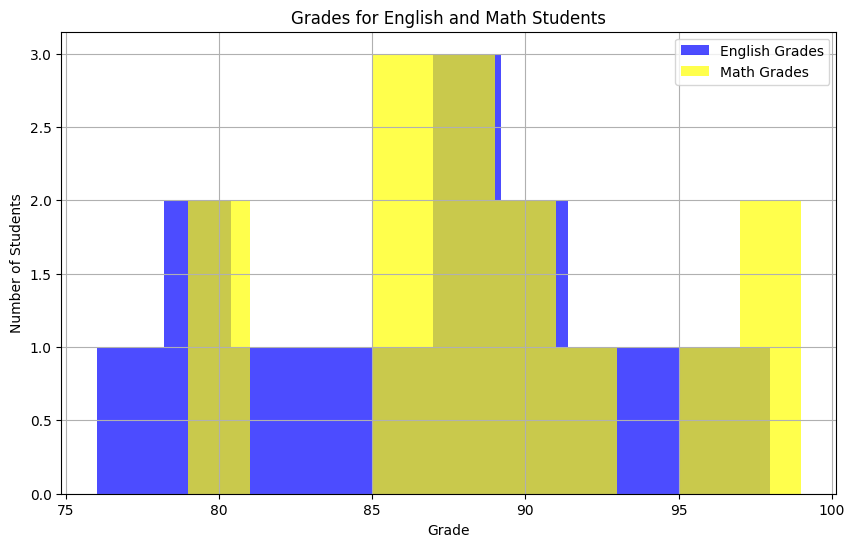

In [37]:
# Let's use matplotlib to display a histogram of the grades distribution
# Histograms are useful for seeing the distribution of the students grades

plt.figure(figsize=(10, 6))
plt.hist(df_studentGrades['englishGrade'], bins=10, alpha=0.7, label='English Grades', color='blue')
# This line creates a new figure with a specified size of 10 inches by 6 inches
# The 'figure' function is used to create a container for the plot
# The 'figsize' argument sets the width and height of the figure in inches
# Step 1: Use the line above as reference to create a histogram for the math grades
# (1 mark)

plt.hist(df_studentGrades['mathGrade'], bins=10, alpha=0.7, label='Math Grades', color='yellow')
# This line creates a histogram of the English grades from the 'df_studentGrades' dataFrame.
# The 'hist' function takes the data to be plotted as its first argument.
# 'bins = 10' spefifies that the data should be divided into 10 bins(ranges of value)
# 'alpha = 0.7' sets the transparency of the bars t0 70%.
# 'label = 'English Grades'' assigns a label to the histogram for use in the legend.

# Step 2: Ensure that your plot is descriptive, so use labels (x and y axis), a title, and a legend.
# This line sets the label for the x-axis of the plot to 'Grade'.
# The 'xlable' function is used to add a lable to the horizontal axis.
plt.xlabel('Grade')

# This line sets the label for the y-axis of the plot to 'Number of Students'.
# The 'ylable' function is used to add a label to the vertical axis.
plt.ylabel('Number of Students')

# This line sets the tite of the plot to 'Grades for English and Math Students'.
# The 'title' function is used to add a title to the plot.
plt.title('Grades for English and Math Students')
# Hint: Use the matplotlib .legend(loc='<location>') to add and place the legend.
# You can use 'upper left', 'upper right', 'lower left', and 'lower right' to specify the location.
# (4 marks)
# This line adds a legend to the plot.
# The 'legend' function is used to display the labels of the different elements in the plot.
# The 'loc = 'upper right' arguent specifies the location of the legend within the plot.
plt.legend(loc='upper right')
plt.grid(True)

# Step 3: Use the .savefig('<image_title>'.png) to output an image file of the histogram.
# Please be sure to use a descriptive title!
# (1 mark)
#The line saves the current figure to a file named ' English_Math_Grades_histogram.png'.
# The 'savefig' function is used to export the plot as an image file.
# The file format is determined by the extention of the filename('.png' in this case).
plt.savefig('English_Math_Grades_histogram.png')

# This line displays the plot.
# The 'show' function is used to render the plot on the screen.
plt.show()

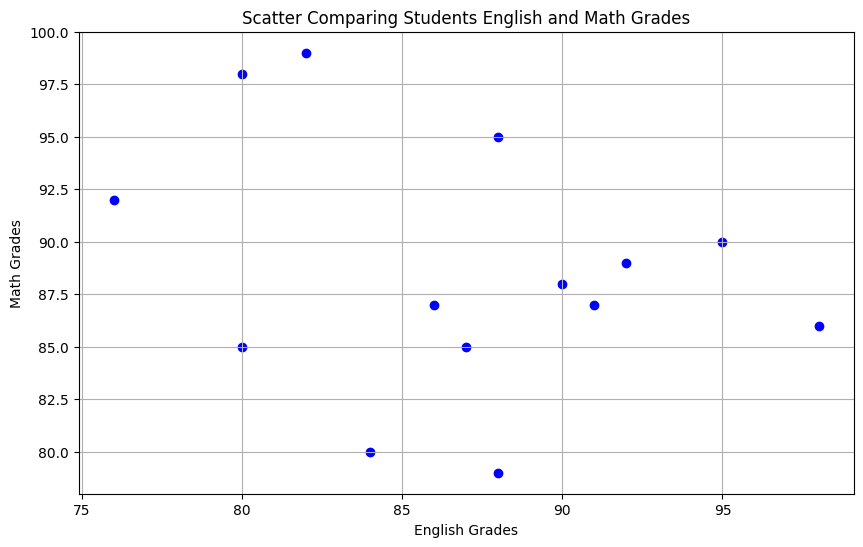

In [38]:
# Let's also use matplotlib to display a scatter plot of English vs. Math grades
# Scatter plots are useful for seeing the relationship between two variables
# This line creates a new figure with a specified size of 10 inches by 6 inches.
# The 'figure' function is used to create a container for the plot.
plt.figure(figsize=(10, 6))

# Step 1: Use .scatter(x_data, y_data) to create a scatter plot using the English grades on the x-axis, and Math grades on the y-axis
# (2 mark)
# This line creates a scatter plot of the English grades against the Math grades.
# This 'scatter' function takes the x-axis data as the first argument and the y-axis data as the second argument.
# 'alpha = 1' sets the transparency of the points to 100%(fully opaque)
# 'color = 'blue' sets the color of the points to blue.
plt.scatter(df_studentGrades['englishGrade'], df_studentGrades['mathGrade'], alpha=1, color='blue')
# Step 1: Properly label the x and y axes as well as the title of your plot.
# (3 marks)
# This lines set the labels for the x and y axes and the title of the plot.
# The 'xlabel' function sets the label for the horizontal axis.
plt.xlabel('English Grades')
# The 'ylabel' function sets the lable for the vertical axis.
plt.ylabel('Math Grades')
# This title function sets the title of the plot.
plt.title('Scatter Comparing Students English and Math Grades')
# The grid function adds a grid to the plot, which make it easier to see the data points.
plt.grid(True)

# Step 2: Output an image file for the scatter plot with a descriptive file name
# (1 mark)
# The savefig function saves the current figure to a file.
# In this case, it saves the scatter plot as a PNG image with the filename "English_Math_Scatter_Plot.png"
plt.savefig('English_Math_Scatter_plot.png')
# Thw show function displays the plot on your screen.
plt.show()

In [39]:
# From the scatter plot, is there a relationship between the Math and English grades?
# (1 mark)
# The print function displays text on the console.
# In this case, it's printing a sentence that describes a trend observed in the scatter plot.
print('Observing the scatter plot we can see that the students who excel at English tend to do worse in Math and vice-versa')
# This line prints another sentence that further explains the observation.
print('from this we see that no student is in the top percentile for both subjects')

Observing the scatter plot we can see that the students who excel at English tend to do worse in Math and vice-versa
from this we see that no student is in the top percentile for both subjects
